# Hola Mauricio!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

# Comentario General
    
Hola Mauricio, te felicito por el buen desarrollo del proyecto. Completaste cada una de las secciones de muy buena manera. 

# OilGiant

## Objectivo

Se necesita encontrar el mejor lugar donde crear 200 nuevos pozos petroleros. Se necesita crear un modelo que ayude a seleccionar una region con el mejor margen de beneficios.

Cuales son los beneficios y los riesgos potenciales? (Se usará bootstrapping para el analisis de riesgos)

## Descripción de datos

Los datos de exploración geológica de las tres regiones se almacenan en archivos:

- `geo_data_0.csv`
- `geo_data_1.csv`
- `geo_data_2.csv`


- *id* — identificador único de pozo de petróleo
- *f0, f1, f2* — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- *product* — volumen de reservas en el pozo de petróleo (miles de barriles).

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buen trabajo estructurando esta sección de introducción. 

## Incorporación de librerias

In [1]:
# Importacion de librerias
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats as st
from scipy.stats import t

from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo importando las librerías necesarias para el desarrollo del proyecto.  </div> 

## Analisis exploratorio

In [2]:
# Carga de datos
# Realizando un pequeño analisis exploratorio de los datos

data0 = pd.read_csv('/datasets/geo_data_0.csv')
data1 = pd.read_csv('/datasets/geo_data_1.csv')
data2 = pd.read_csv('/datasets/geo_data_2.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo cargando los datasets.   </div> 

In [3]:
data0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo realizando esta exploración inicial del contenido de cada uno de los datasets.   </div> 


<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Adicionalmente, a la exploración ya realizada sería interesante revisar si existen registros/valores duplicados dentro de los datasets.   </div> 

<div class="alert alert-block alert-info">
<b>De acuerdo, se revisará</b> <a class="tocSkip"></a>
</div>


### Correlación de datos

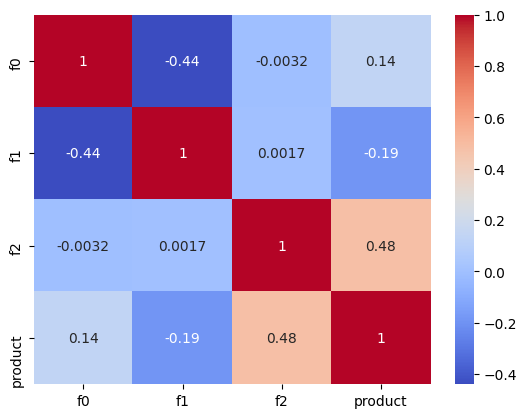

In [10]:
corr = data0.corr()  # Calculate the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')  # Create a heatmap
plt.show()  # Show the plot

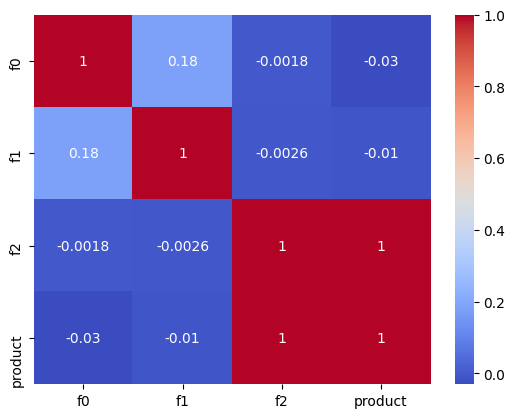

In [11]:
corr = data1.corr()  # Calculate the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')  # Create a heatmap
plt.show()  # Show the plot

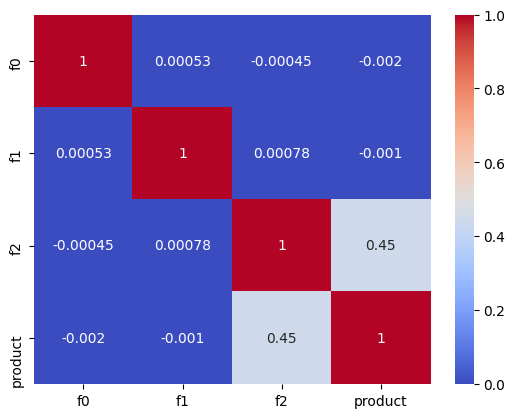

In [12]:
corr = data2.corr()  # Calculate the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')  # Create a heatmap
plt.show()  # Show the plot

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo estudiando las correlaciones entre las características de cada uno de los datasets .   </div> 

### Comentarios

Dada la revision:
1. Los datasets son identicos en cuanto a estructuras de datos.
1. Se considera que los tipos de datos son adecuados. 
1. No hay valores ausentes
1. En todas las regiones parece ser que la caracteristica 2 tiene gran impacto en la variable objetivo en menos o mayor medida.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buen trabajo.   </div> 

## Creacion de funciones para tratamiento de los datos

In [13]:
# para ser usado a lo largo de todo el experimento
state = np.random.RandomState(12345)

In [14]:
def data_loading(file_name):
    print(f"Loading {file_name} file... ")
    data = pd.read_csv('/datasets/' + file_name)
    print(f"Shape: {data.shape}")
    return data

In [15]:
def data_segmentation(data, state): 
    # Obteniendo los features
    features = data.drop(['id', 'product'], axis=1)
    
    # Obteniendo la columna target
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, 
        test_size=0.25, random_state=state
    )

    return features_train, features_valid, target_train, target_valid

In [17]:
def train_and_get_model(features_train, target_train):
    # Create linear regression object. (This is the required algorithm)
    model = LinearRegression()

    # Train the model using the training sets
    model.fit(features_train, target_train)

    return model

In [24]:
from sklearn.model_selection import cross_val_score

def train_and_get_model_cv(features, target):
    # Create linear regression object. (This is the required algorithm)
    model = LinearRegression()

    # Train the model using cross_vall_score function
    scores = cross_val_score(model, features, target, cv=3)
    print("Scores: ", scores)
    return model

<div class="alert alert-block alert-info">
<b>Pregunta con respecto al manejo del modelo y la division de los datos vs cross_val_score</b> <a class="tocSkip"></a>
</div>


In [19]:
def display_metrics(target_valid, target_pred):
    # Getting mean squared error from the model
    mse=mean_squared_error(target_valid, target_pred)
    print(f"Mean squared error: {mse:.2f}, RMSE: {mse**0.5:.2f}")

    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(target_valid, target_pred))
    return 

In [22]:
# Data_analysis and modeling
def data_analysis(data, state):
    
    # Segmentacion de datos
    #features_train, features_valid, target_train, target_valid = data_segmentation(data, state)

    # Get model based on training
    #model = train_and_get_model(features_train, target_train)

    
    
    ## Just to test ##
    # Obteniendo los features
    features = data.drop(['id', 'product'], axis=1)
    
    # Obteniendo la columna target
    target = data['product']
    
    model = train_and_get_model_cv(features, target)
    
    target_pred = model.predict(features)
    print()
    print("Model results:")
    display_metrics(target, target_pred)
    
    # Performing a test over mean
    print()
    print("Sanity Test (pred=mean):")
    target_pred_as_mean = pd.Series(target.mean(), target.index)
    display_metrics(target, target_pred_as_mean)
    ## Just to test ##
    
    
    

    
    # Show metrics
    # Make predictions using the validation set
    #target_pred = model.predict(features_valid)
    #print()
    #print("Model results:")
    #display_metrics(target_valid, target_pred)
    
    # Performing a test over mean
    #print()
    #print("Sanity Test (pred=mean):")
    #target_pred_as_mean = pd.Series(target_valid.mean(), target_valid.index)
    #display_metrics(target_valid, target_pred_as_mean)

    return model


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo estructurando cada una de las funciones de manera modular para desplegar los diferentes modelos. Muy buen trabajo, te felicito por el uso de estas estructuras ya más avanzadas.  </div> 

## Machine Learning para cada region

In [19]:
data0 = data_loading("geo_data_0.csv")
model0 = data_analysis(data0, state)

Loading geo_data_0.csv file... 
Shape: (100000, 5)

Model results:
Mean squared error: 1412.21, RMSE: 37.58
Coefficient of determination: 0.28

Sanity Test (pred=mean):
Mean squared error: 1961.25, RMSE: 44.29
Coefficient of determination: 0.00


In [25]:
# Prueba
data0 = data_loading("geo_data_0.csv")
model0 = data_analysis(data0, state)

Loading geo_data_0.csv file... 
Shape: (100000, 5)
Scores:  [0.27224511 0.28003193 0.27474578]


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [20]:
data1 = data_loading("geo_data_1.csv")
model1 = data_analysis(data1, state)

Loading geo_data_1.csv file... 
Shape: (100000, 5)

Model results:
Mean squared error: 0.79, RMSE: 0.89
Coefficient of determination: 1.00

Sanity Test (pred=mean):
Mean squared error: 2119.45, RMSE: 46.04
Coefficient of determination: 0.00


In [21]:
data2 = data_loading("geo_data_2.csv")
model2 = data_analysis(data2, state)

Loading geo_data_2.csv file... 
Shape: (100000, 5)

Model results:
Mean squared error: 1596.65, RMSE: 39.96
Coefficient of determination: 0.20

Sanity Test (pred=mean):
Mean squared error: 2002.35, RMSE: 44.75
Coefficient of determination: 0.00


### Comentarios:
1. El modelo (Regresion Lineal) ejecutado al set de datos geo_data_1.csv logró detectar la estrecha relación entre la variable f2 con el objetivo. 
* El coeficiente de determinación en este caso fue 1 (prediccion perfecta)
* Es posible que los datos hayan sido generados manualmente a partir de la variable objetivo.

2. Los coeficientes y metricas resultantes para los set de datos geo_data_0 y geo_data_2 son similares.
3. Se tiene un mejor resultado con los mejores indicadores sobre la primer region (geo_data_0)

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo realizando el despliegue y estudio de los modelos. 

## Analisis de negocio

### Consideraciones

* Necesidades: 200 pozos
* Presupuesto: 100 mdd
* 1 Barril = 4.5 usd ingresos
* 1 Unidad = 1000 barriles = 4500 usd
* volumen de reserva = unidades = Miles de barriles
* Para evitar perdidas, un pozo debe producir 111.1 unidades o 500,000 dolares


Se debe seleccionar 
* La region con el beneficio promedio mas alto
* Riesgo de perdidas inferior a 2.5

### Producto promedio por region

In [22]:
average_product_0 = data0["product"].mean()
average_product_1 = data1["product"].mean()
average_product_2 = data2["product"].mean()

print(average_product_0)
print(average_product_1)
print(average_product_2)

92.50000000000001
68.82500000000002
95.00000000000004


Para calcular el beneficio de cada pozo dada la inversion de 100 millones por 200 pozos:
1. El producto disponible debe representar/producir al menos un valor de 500000 dolares
1. El producto disponible debe ser mayor a 111.1 unidades de lo contrario representa una perdida

Dado lo anterior la ganancia se puede representar como <strong>(producto*4500)-500000 </strong>

*(Se sugiere calcular con base en el costo por unidad para evitar la falta de precision resultante de trabajar con fracciones de unidad)*

Los pozos que pueden evitar perdida deberán tener producto de al menos **111.2** unidades

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo. 

### Calculando la ganancia de un conjunto de pozos

In [23]:
# Obtiene un subconjunto n de pozos con mayor margen de ganancias 
# De igual forma calcula y muestra la ganancia de los n pozos
def calculate_profit(wells, count):
    #profit calculation based on availale product
    wells["profit"] = (wells["product"]*4500)-500000
    
    #profit calculation due n best wells
    selected = wells.sort_values(by=['product'], ascending=False)[:count]
    profit = selected["profit"].sum()
    
    print(f"Region Profit = {profit:.2f}")
    
    #display(selected.shape)
    return selected

In [24]:
selected0 = calculate_profit(data0, 200)
selected1 = calculate_profit(data1, 200)
selected2 = calculate_profit(data2, 200)

Region Profit = 66350365.68
Region Profit = 24150866.97
Region Profit = 70596329.28


#### Comantarios:
De lo anterior y basado en el producto promedio mas alto se comprueba que la region 2 es la mas rentable con el mas alto margen de ganancias.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo realizando el cálculo de las ganancias.

## Riesgos y Ganancias por cada region

### Bootstrapping por region (partiendo de los mejores 200 pozos)

In [25]:
def bootstrap_for_test(data, model, state):
    ## A partir de 200 pozos seleccionados, se generarán pruebas utilizando la tecnica de bootstraping
    bootstrap = pd.DataFrame()

    for i in range(1000):
        sample = data.sample(n=1, replace=True, random_state=state)
        bootstrap = bootstrap.append(sample)
    
    # Obteniendo los features (retirando la variable objetivo)
    try:
        features = bootstrap.drop(['id', 'product', 'profit'], axis=1)
    except:
        print("targets does not exist")
        
    # Estimando el producto a partir del modelo asociado a la region
    bootstrap['product'] = model.predict(features)
    
    # Calculando la ganancia de los mejores 200 pozos de la muestra (se localizan igualmente)
    bootstrap = calculate_profit(bootstrap, 200)
    
    mean_profit = bootstrap["profit"].mean()
    print("Mean profit: ", mean_profit)
    
    confidence_interval = t.interval(
        0.95, len(bootstrap["profit"])-1, loc=mean_profit, scale=bootstrap["profit"].sem()
    )
    print('Confidence Interval(95 %): ', confidence_interval)
    
    ## Buscando posibles perdidas en la muestra generada
    loss = bootstrap.query("profit<0")
    print("Possible loss: ", loss.shape[0])
    
    return

In [26]:
bootstrap_for_test(selected0, model0, state)

Region Profit = 28058044.90
Mean profit:  140290.22451597656
Confidence Interval(95 %):  (134925.46566057668, 145654.98337137644)
Possible loss:  0


<div class="alert alert-block alert-info">
<b>Duda sobre el mejor camino para utilizar bootstrapping</b> <a class="tocSkip"></a>
</div>


In [27]:
bootstrap_for_test(selected1, model1, state)

Region Profit = 24626571.72
Mean profit:  123132.85859197393
Confidence Interval(95 %):  (122897.81520948831, 123367.90197445954)
Possible loss:  0


In [28]:
bootstrap_for_test(selected2, model2, state)

Region Profit = 17763736.16
Mean profit:  88818.68078523371
Confidence Interval(95 %):  (84065.35435409645, 93572.00721637097)
Possible loss:  0


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo aplicando el bootstraping.

### Comentarios Finales

    3. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior en el punto 4.3?
    
    
#### Resumen    

En relacion al entrenamiento de un modelo de datos, se generaron los siguientes indicadores:

* Region 0
- RMSE: 37.58 y R2: 0.28

* Region 1
- RMSE: 00.89 y R2: 1.00

* Region 2
- RMSE: 39.96 y R2: 0.20

Para todas, son mejores resultados que la media como prueba de cordura.

De lo anterior resulta ser un mejor modelo el que se encuentra asociado a los datos de la region 0.

Los resultados y los datos asociados a la region 1 resultan ser muy dudosos dado el coeficiente de determinacion = 1 obtenido.

El producto promedio de cada Region así como el beneficio calculado para los mejores 200 pozos:

* Producto
R0 = 92.50, R1 = 68.825, R3 = 95.00

* Beneficio para cada region:
R0 = 66350365.68, 
R1 = 24150866.97, 
R2 = 70596329.28

En un principio dado el beneficio generado por las regiones, se podría pensar que la Region 2 debería considerarse para elegir los 200 pozos, sin embargo dado pruebas utilizando la tecnica de bootstrapping dejó ver que el margen de ganancias crece sobre la region 1 donde se puede asumir que el modelo con mejores resultados actua.

***La propuesta final para establecer los 200 pozos es la region 1.***

In [29]:
print("Done!")

Done!


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Muy buen trabajo!